# WAVEPAL - Quick start

Train yourself by reproducing this code in python.
For in-depth analyses, I strongly recommend the use of the ipython notebook. This tutorial was made with that tool. 

## 1. Reading the data and initializing Wavepal

Start importing wavepal and other usual packages

In [1]:
% matplotlib inline
# other option (instead of "inline"): nbagg
# N.B.: the two previous lines are used by ipython. Do not write them in your python code.  
import numpy as np
import matplotlib.pyplot as plt
import copy
import wavepal as wv

wavepal is illustrated here with ODP1148 d18O benthic time series.
Ref:
Z. Jian, Q. Zhao, X. Cheng, J. Wang, P. Wang, and X. Su. Pliocene-pleistocene stable isotope and paleoceanographic changes in the northern south china sea. Palaeogeography, Palaeoclimatology, Palaeoecology, 193(3–4):425–442, 2003.

Read the data

In [2]:
data=np.genfromtxt("ODP1148-BF-18O.txt")
myt=data[:,0]
mydata=data[:,1]

Initialize the class called Wavepal (which is a class of the package wv)

In [3]:
x=wv.Wavepal(myt, mydata, "Age", "$\delta{}^{18}O$", t_units="ka", mydata_units="permil")

To get more info about the inputs at the initialization, use the help:

In [4]:
help(x.__init__)

Help on method __init__ in module wavepal.Wavepal:

__init__(self, t, mydata, t_axis_label='', mydata_axis_label='', t_units=None, mydata_units=None) method of wavepal.Wavepal.Wavepal instance
    Constructor of Wavepal class. It Initializes all the variables of Wavepal class with an access outside Wavepal (the user can access them). The list of available variables is given in this function.
    Required Inputs:
    - t [1-dim numpy array of floats]: the times of the time series, distinct and in ascending order.
    - mydata [1-dim numpy array of floats - size=time.size]: the data at the times given by 't'.
    Optional Inputs:
    - t_axis_label="": label for the time axis in figures
    - mydata_axis_label="": label for the data axis in figures
    - t_units=None: units of 't' (string type)
    - mydata_units=None: units of 'mydata' (string type).
    Outputs:
    /
    -----------------------------
    This is part of WAVEPAL
    (C) 2016 G. Lenoir



Here is the list of all the methods of the Wavepal class:
- check_data <span style="color:red">[compulsory]</span>
- plot_timestep 
- plot_trend 
- choose_trend_degree <span style="color:red">[compulsory]</span>
- carma_params <span style="color:red">[compulsory if you perform a test of significance]</span>
- trend_vectors <span style="color:red">[compulsory]</span>
- freq_analysis <span style="color:red">[frequency analysis]</span>
- freq_filtering <span style="color:red">[filtering in a frequency band]</span>
- plot_WOSA_segmentation
- plot_number_WOSA_segments
- plot_periodogram
- plot_f_periodogram
- plot_check_convergence_percentiles
- plot_pseudo_spectrum
- plot_variance_anal
- plot_amplitude
- plot_amplitude_vs_periodogram
- timefreq_analysis <span style="color:red">[time-frequency analysis]</span>
- timefreq_ridges_filtering <span style="color:red">[ridges filtering]</span>
- timefreq_band_filtering <span style="color:red">[filtering in a frequency band]</span>
- plot_scalogram
- plot_check_convergence_percentiles_cwt
- plot_pseudo_cwtspectrum_anal
- plot_pseudo_cwtspectrum_mcmc
- plot_cwt_variance_anal
- plot_cwtamplitude
- plot_cwtamplitude_squared
- plot_global_scalogram
- plot_check_convergence_percentiles_global_scalogram
- plot_pseudo_global_spectrum
- plot_global_cwt_variance_anal
- plot_global_amplitude
- plot_global_amplitude_vs_global_scalogram

For each method, you have at your disposal a detailed explanation about what it does and about the inputs and outputs, thanks to "help". Example with freq_analysis method:

In [5]:
help(x.freq_analysis)

Help on method freq_analysis in module wavepal.Wavepal:

freq_analysis(self, freqmin=None, freqmax=None, freqstep=None, dt_GCD=None, freq_min_bound='yes', freq_max_bound='yes', mywindow=1, D=None, betafact=0.75, coverage=90.0, WOSA_segments=None, percentile=None, weighted_WOSA='yes', n_moments=10, MaxFunEvals=100000, algo_moments='gamma-polynomial', computes_amplitude='no') method of wavepal.Wavepal.Wavepal instance
    freq_analysis computes the WOSA periodogram and its confidence levels and the amplitude periodogram.
    Optional Inputs:
    - freqmin=None: minimal frequency. Default value is freqmin=1.0/(t[-1]-t[0]) (where t is the time vector)
    - freqmax=None: maximal frequency. Default value is freqmax=1.0/2.0/dt_GCD
    - freqstep=None: frequency step. Default value is freqstep=(freqmax-freqmin)/t.size (where t is the time vector)
    - dt_GCD=None: the greatest common divisor of the time steps of the time vector. Default value is the smallest time step (which is not exactly d

N.B.: you can get all of them with: help(x.\_\_module\_\_)

Below is presented an example of spectral analysis using some of those methods. 

## 2. Preliminary analysis

Check the data set

In [6]:
x.check_data()

Figure of the time step in function of time, with an histogram of the distribution of the time steps

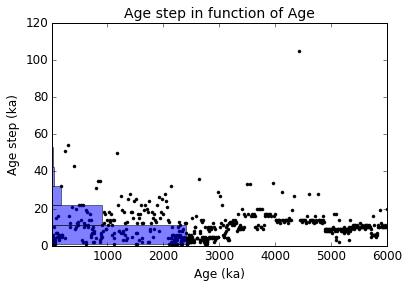

In [7]:
plot_timestep=x.plot_timestep()
plot_timestep.show()

Do the following if you want to save the figure

In [8]:
plot_timestep.savefig("timestep.pdf")
plot_timestep.close()

Figure of the trend. Try many degrees of the polynomial.

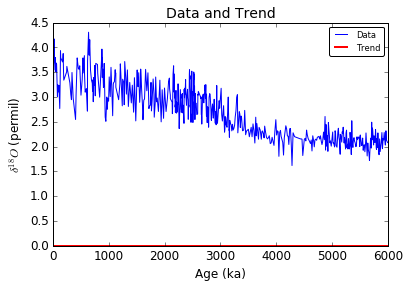

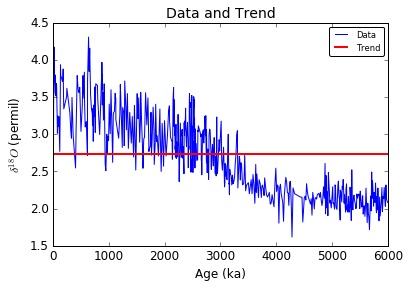

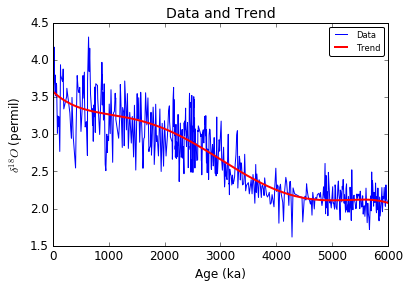

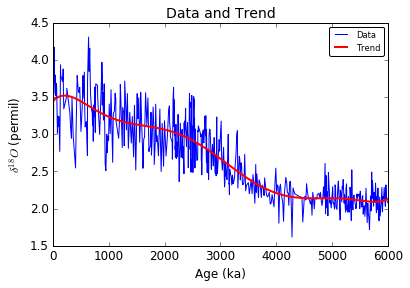

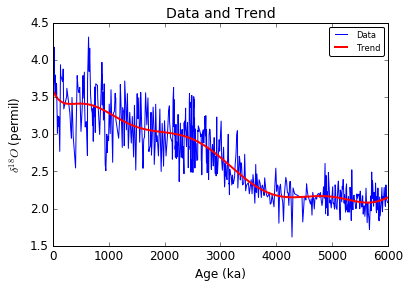

In [9]:
plot_trend=x.plot_trend(pol_degree=-1)    # no trend
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=0)    # constant trend
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=5)    
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=7)   
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=9)    
plot_trend.show()

and choose the degree of the polynomial for the subsequent analyses

In [10]:
x.choose_trend_degree(7)

Compute some variables related to the trend

In [11]:
x.trend_vectors()

## 3. CARMA(p,q) Background Noise Analysis

Option make_carma_fig="yes" allows to save some figures related to the analyses of the background noise (made with 'carma pack' package of Kelly & al. - see the reference in the help of carma_params method). They are here saved in the folder "figures_carma", previously created by the user. 

In [12]:
x.carma_params(make_carma_fig="yes",nbins=20,dpi=400,path_to_figure_folder="figures_carma/")  

****************************
*        CARMA PACK        *
****************************

Generates  10000  samples
***********************************
Calculating sigma...
Calculating log-likelihoods...
Plotting parameter summary
Plotting parameter summary
Plotting parameter summary
Plotting parameter summary
Decorrelation length (in number of samples):  23
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Median coefficients:
--------------------
alpha:  0.167365542778
std white noise:  0.149611686122


## 4. Frequency Analysis

Choose the percentiles for significance testing

In [13]:
percentile=np.zeros(2)
percentile[0]=95.
percentile[1]=99.9

N.B.: If you are not interested in the frequency analysis, you can skip the code below and go to section 5. 

Run the method for the frequency analysis (do not forget to use help(x.freq_analysis) if needed)

In [14]:
x.freq_analysis(freqstep=0.0001,D=600.,percentile=percentile,n_moments=12,computes_amplitude="yes")

  0%|          | 0/532 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0547705311469 
Main loop, over the frequencies:


100%|██████████| 532/532 [00:18<00:00, 28.22it/s]


Periodogram. This is the central result for the frequency analysis. 

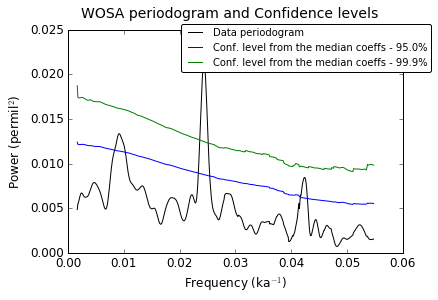

In [15]:
plot_periodogram=x.plot_periodogram(fontsize_legend=10)
plot_periodogram.show()

Figure of the WOSA segmentation

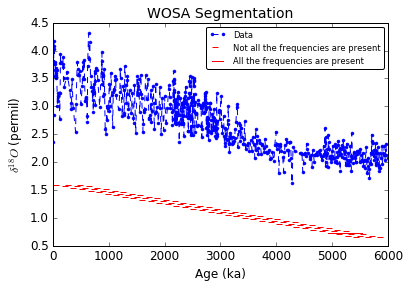

In [16]:
plot_WOSA_segmentation=x.plot_WOSA_segmentation()
plot_WOSA_segmentation.show()

Figure of the number of WOSA segments for each frequency

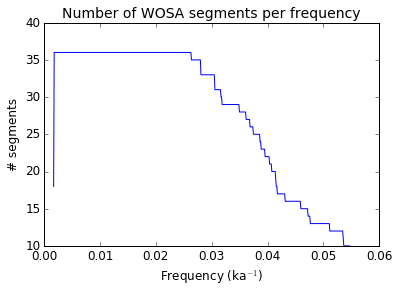

In [17]:
plot_number_WOSA_segments=x.plot_number_WOSA_segments()
plot_number_WOSA_segments.show()

Check the convergence of the analytical confidence levels

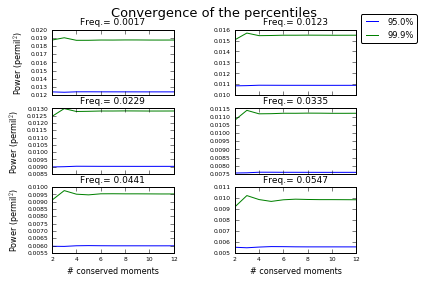

In [18]:
plot_check_convergence_percentiles=x.plot_check_convergence_percentiles(fontsize_suptitle=13,fontsize_title=9,fontsize_axes=8,fontsize_ticks=6)
plot_check_convergence_percentiles.show()

Compare the squared amplitude vs the periodogram

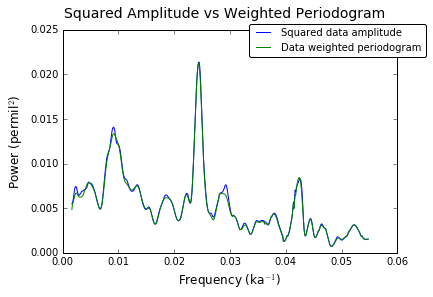

In [19]:
plot_amplitude_vs_periodogram=x.plot_amplitude_vs_periodogram(fontsize_legend=10)
plot_amplitude_vs_periodogram.show()

## 5. Time-frequency Analysis

Define the times at which the CWT (continuous wavelet transform) is to be computed

In [20]:
theta=np.linspace(myt[0],myt[-1],2000)

### First analysis

Run the method for the time-frequency analysis. Note that the percentages of the progressing bars are not fully reliable, since the iterations in those loops do not spend equal computing time.

In [21]:
x.timefreq_analysis(theta=theta,w0=5.5,permin=10.,percentile=percentile)

  0%|          | 5/2000 [00:00<00:43, 45.38it/s]

Weights for the CWT squared norm and Shannon-Nyquist exclusion zone:


  0%|          | 0/133 [00:00<?, ?it/s]

Re-estimated period range: from  10.0  to  970.058602567
Main loop, over the time-frequency plane:


100%|██████████| 133/133 [11:31<00:00, 13.61s/it]


Set the location of the ticks

In [22]:
time_string=[0., 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000.]
period_string=[10., 21., 41., 100., 200., 400., 800., 1500.]
dashed_periods=[21., 41., 100.]

Scalogram. This is the central result for the time-frequency analysis. Resizing (with set_size_inches) is better, and is compulsory before saving the figure (with savefig).

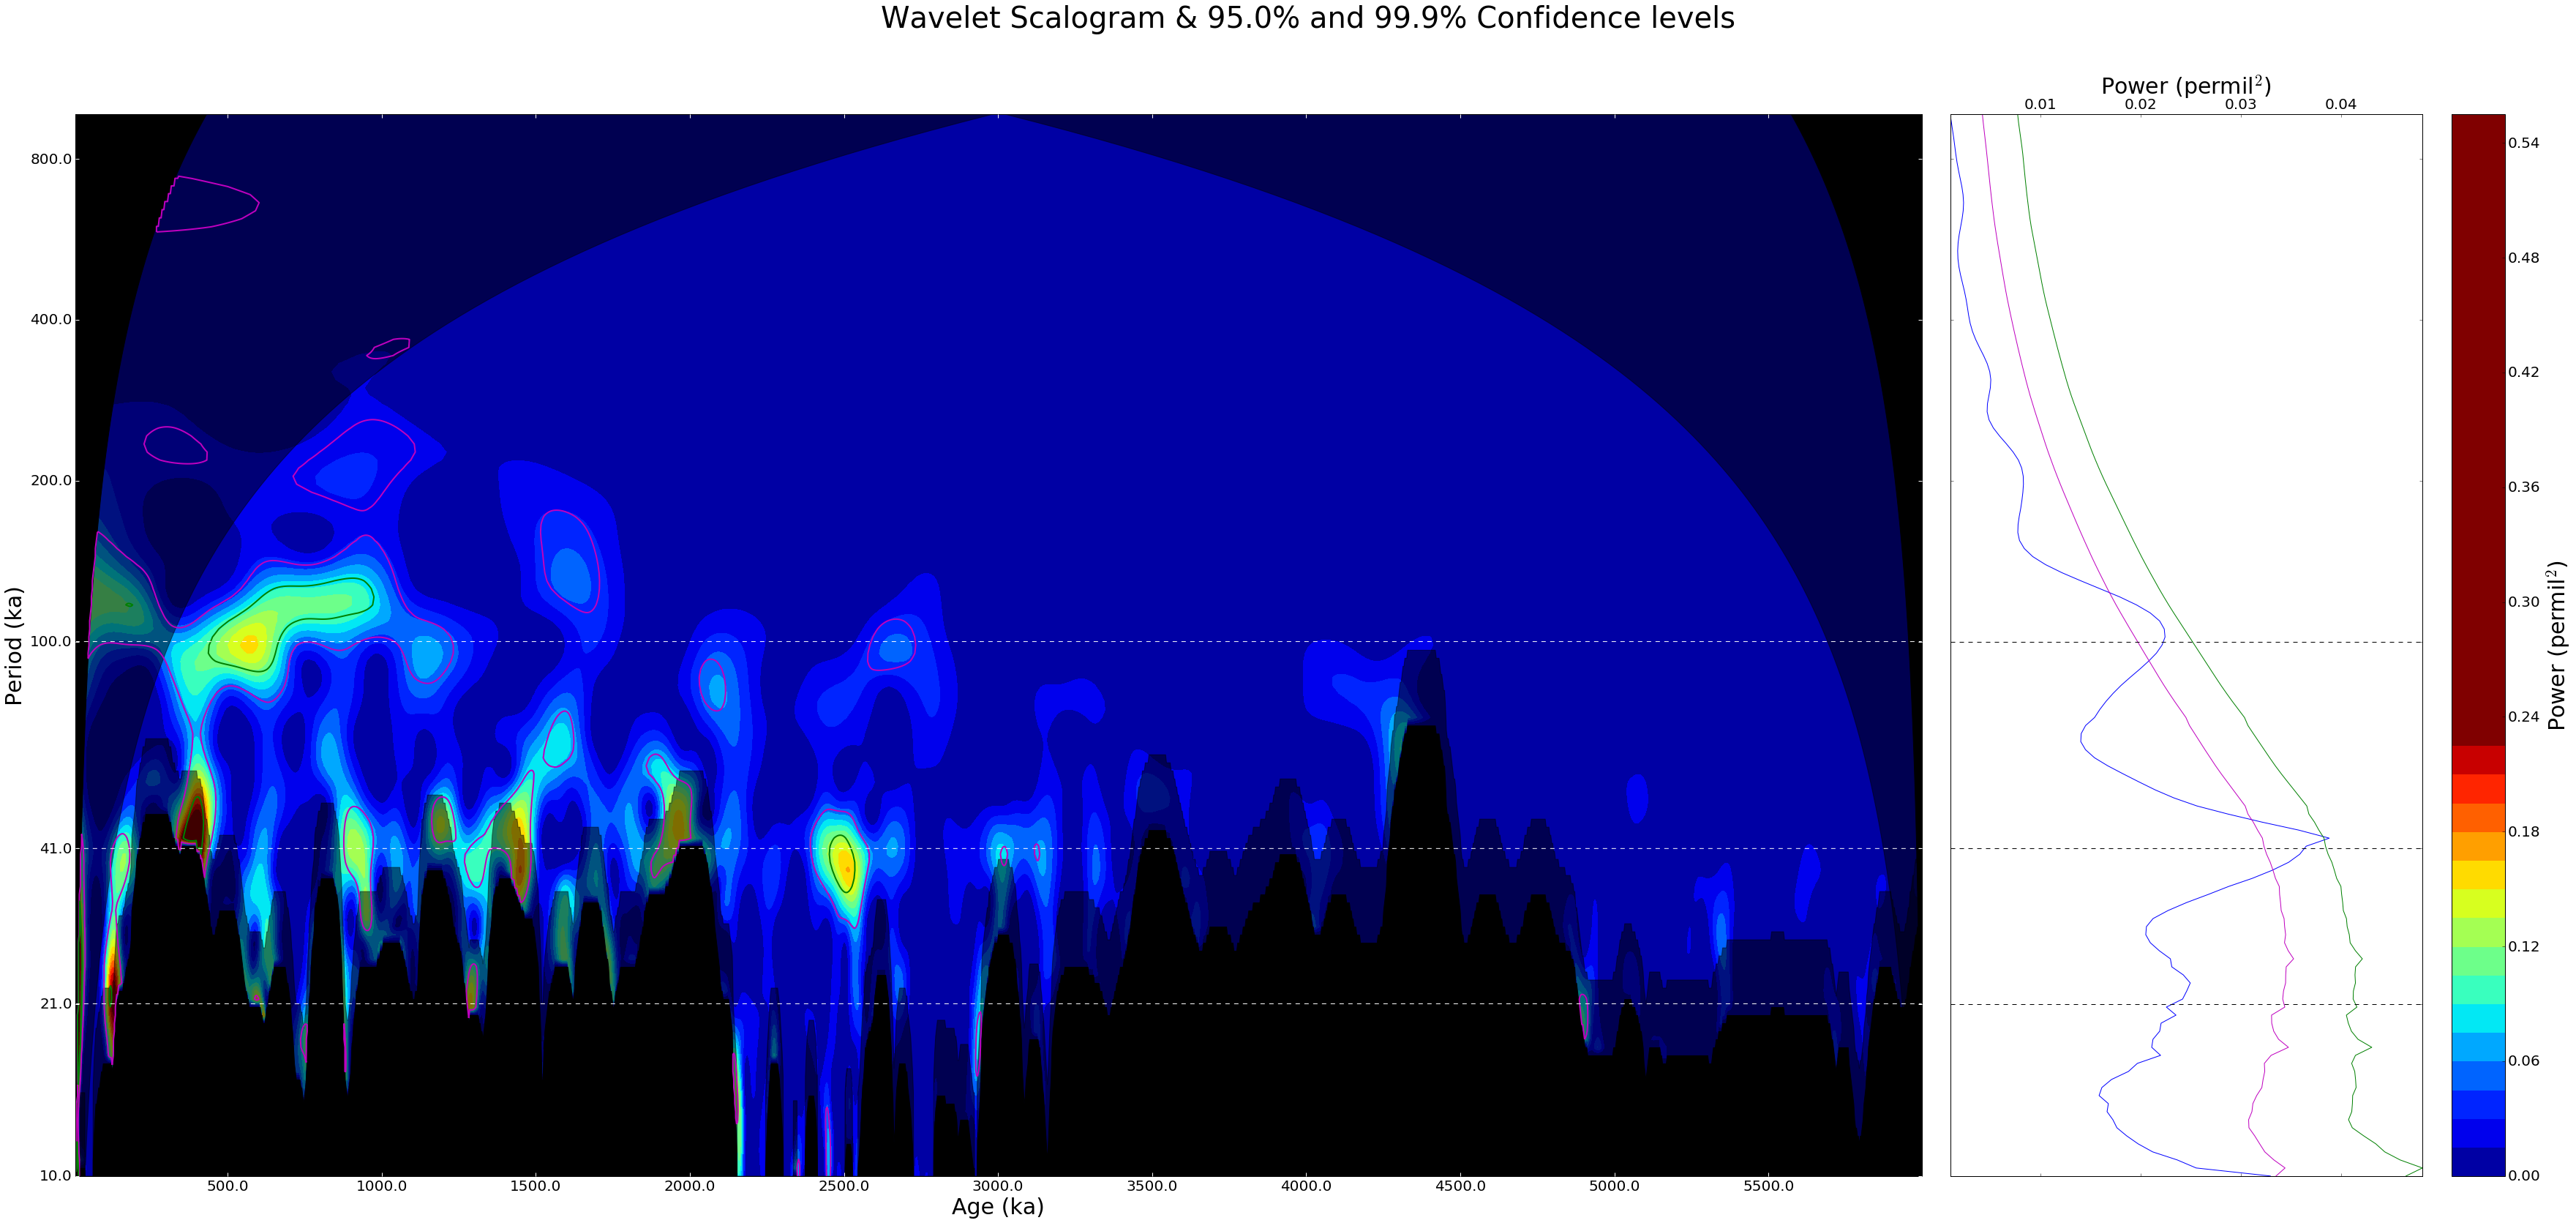

In [23]:
plot_scalogram=x.plot_scalogram(color_cl_anal=['m','g'],fontsize_title=40,fontsize_ticks=20,fontsize_axes=30,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods)
fig = plt.gcf()
fig.set_size_inches(52, 26)
plot_scalogram.show()

### Second analysis

Same analysis, with another time-frequency resolution (change the "w0" parameter of the Morlet Wavelet)

In [24]:
y=copy.copy(x)  # optional: in order to keep in memory all what we did up to here (very convenient if you work with ipython)
y.timefreq_analysis(theta=theta,w0=15.0,permin=10.,percentile=percentile)

  0%|          | 7/2000 [00:00<00:31, 64.16it/s]

Weights for the CWT squared norm and Shannon-Nyquist exclusion zone:


  0%|          | 0/104 [00:00<?, ?it/s]

Re-estimated period range: from  10.0  to  355.062231062
Main loop, over the time-frequency plane:


100%|██████████| 104/104 [09:05<00:00, 13.88s/it]


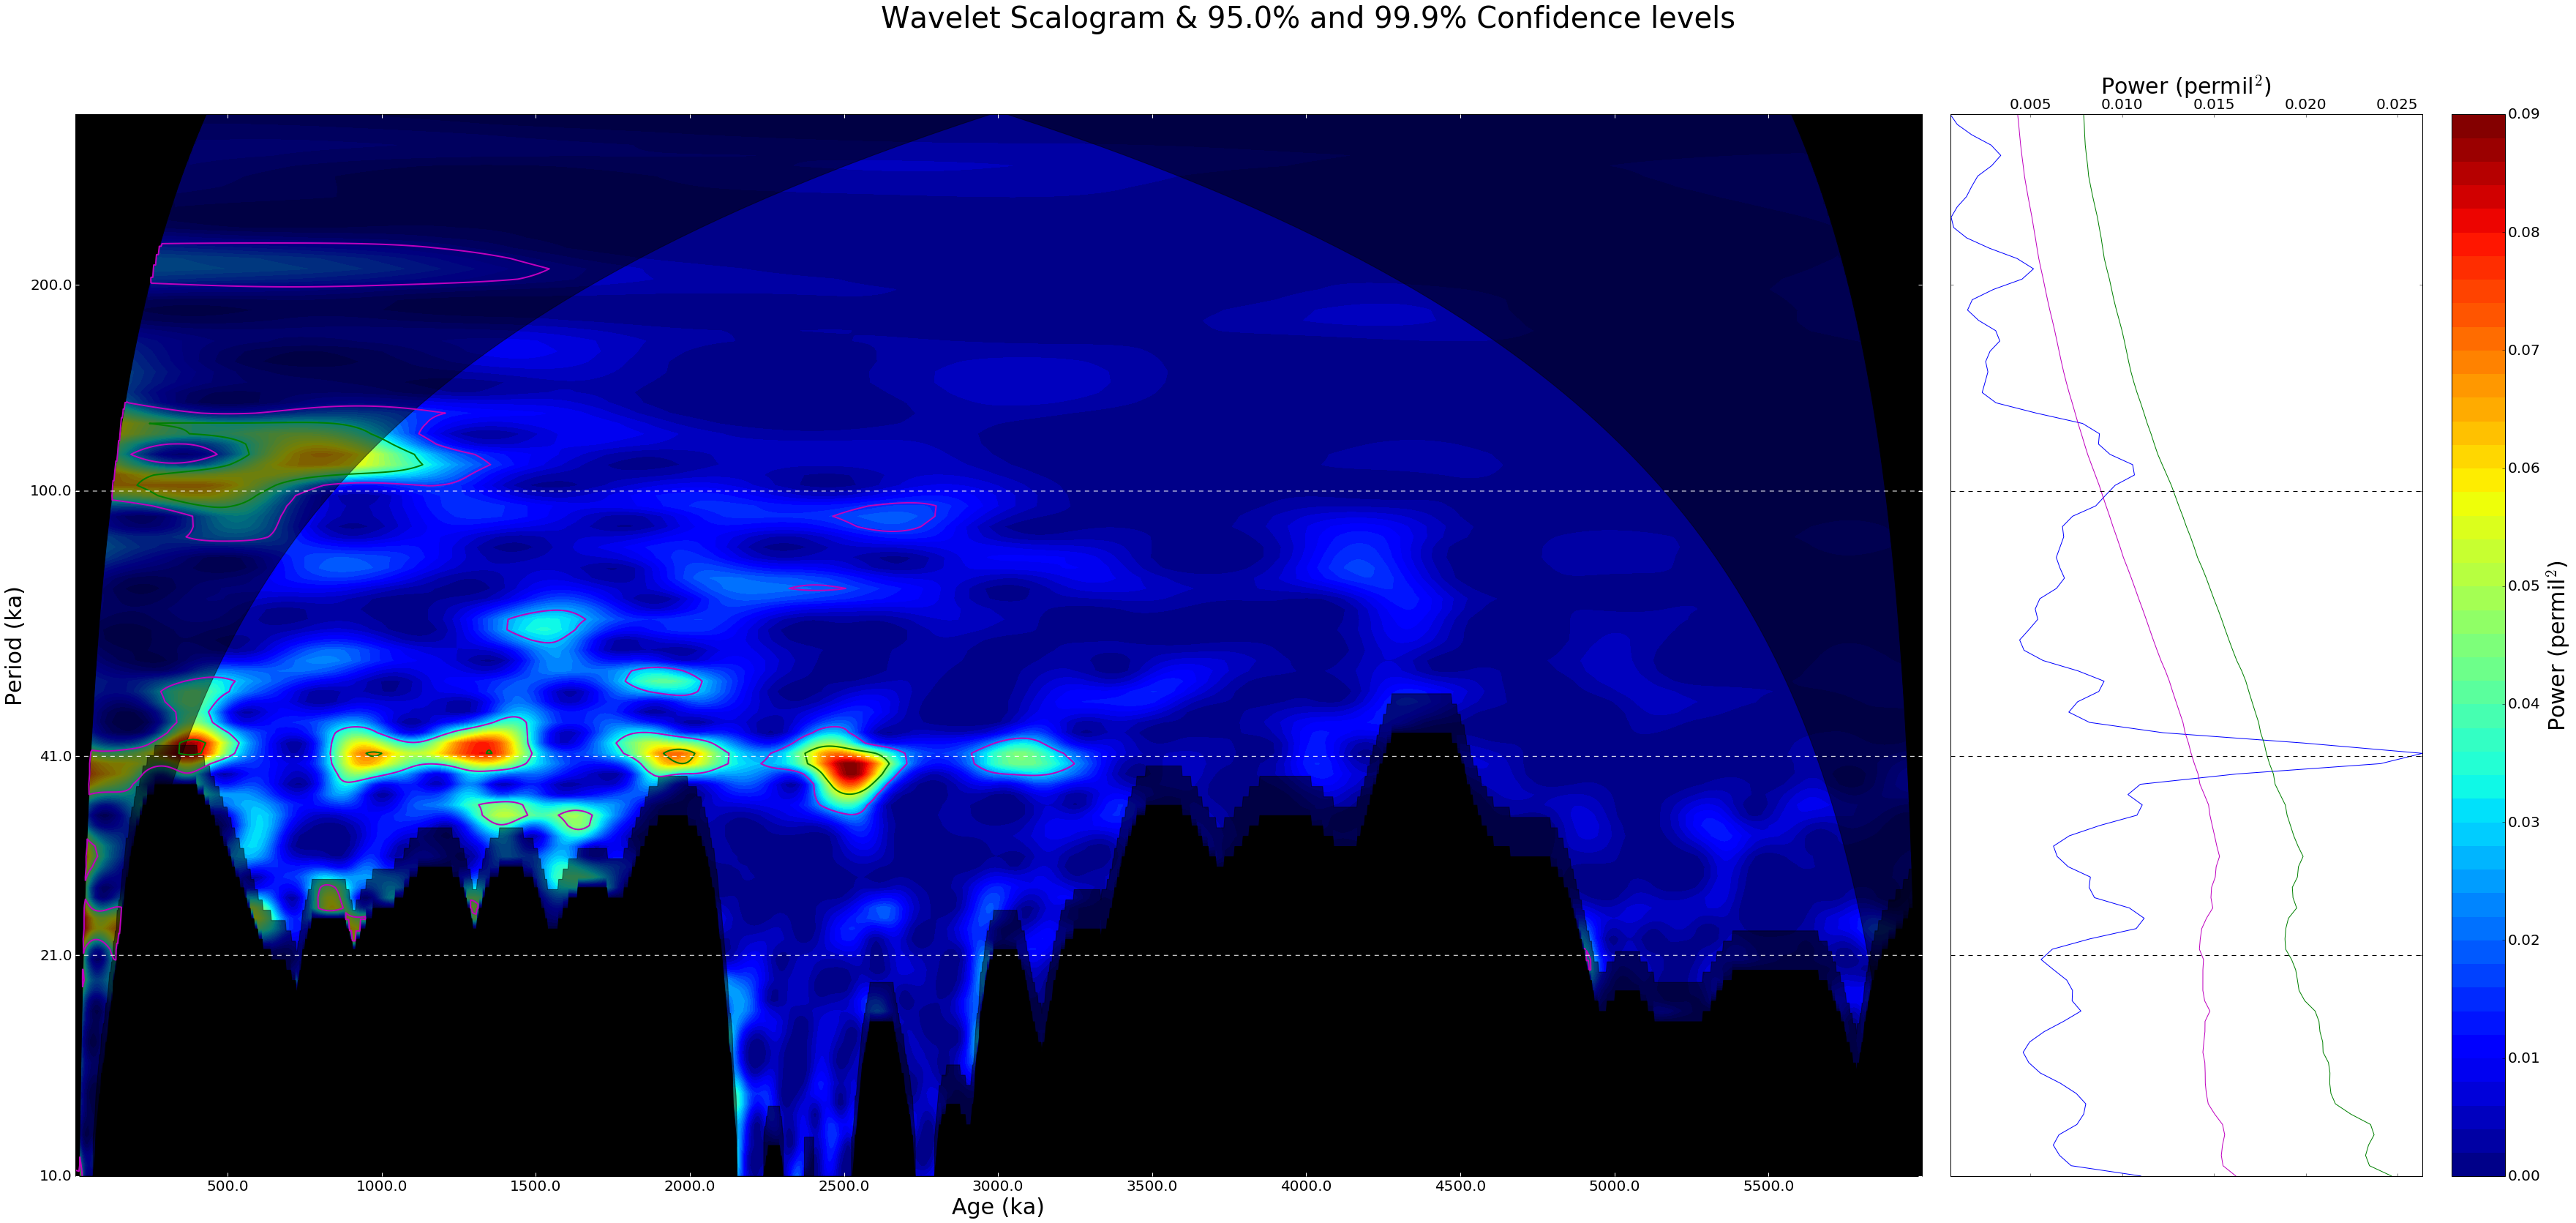

In [25]:
plot_scalogram=y.plot_scalogram(color_cl_anal=['m','g'],fontsize_title=40,fontsize_ticks=20,fontsize_axes=30,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods)
fig = plt.gcf()
fig.set_size_inches(52, 26)
plot_scalogram.show()

## 6. Working with the attributes of Wavepal

You may want to access the attributes of the Wavepal class. The list of available attributes is given in the method \_\_init\_\_ of the Wavepal class (open the file Wavepal.py). Most of them are initialized as <span style="color:red">None</span>. Their values may change when running the methods of Wavepal. Consequently, I recommend to read, save, and possibly modify (with caution) for further use, the attributes of Wavepal after you have run all the desired methods.

Getting the value of an attribute is easy. Example with 'nt' (number of data points):

In [26]:
x.nt

608

The attributes are listed below, with some details given.

### Attributes defined in the initialization of Wavepal class (\_\_init\_\_ method)

- t [1-D numpy array of floats]: the times of the time series.
- mydata [1-D numpy array of floats]: the data corresponding to t. 
- t\_axis\_label [str]: label for the time axis in figures
- mydata\_axis\_label [str]: label for the data axis in figures
- t\_units [str]: units of 't'
- mydata\_units [str]: units of 'mydata'
- t\_label [str]: same as t\_units, with parentheses
- mydata\_label [str]: same as mydata\_units, with parentheses
- freq\_label [str]: t\_units${}^{-1}$, with parentheses
- power\_label [str]: mydata\_units${}^{2}$, with parentheses


### Attributes defined in 'check_data' method

- nt [int]: number of time/data points, after removing the multiple occurrences of the same times.
- run\_check\_data [bool]: True if 'check\_data' was run without any trouble. False if not. 

### Attribute defined in 'plot_timestep' method

- dt [float]: time step

### Attributes defined in 'choose_trend_degree' method

- pol\_degree [int]: degree of the polynomial trend
- trend [1-D numpy array of floats - size=t.size]: the trend.
- run\_choose\_trend\_degree [bool]: True if 'choose\_trend\_degree' was run without any trouble. False if not.

### Attributes defined in 'carma_params' method

- p [int]: C-AR order of the CARMA(p,q) process
- q [int]: C-MA order of the CARMA(p,q) process
- signif\_level\_type [str]: "", "a", "n" or "an". Choice made for the type of significance/confidence levels. 
- nmcmc [int]: number of MCMC samples.
- mylength [int]: lag indicating the decorrelation length for the MCMC samples of the parameters of the CARMA(p,q) process. The value given here is the max. of the decorrelation lengths on all the parameters.
- beta\_gam [float]: used when p=q=0 (white noise). Scale parameter of the gamma distribution. See the formulas of the posterior distribution for the variance of the white noise process. 
- sigwn\_unique [float]: "best" standard deviation. If p=q=0 (white noise), this is the value for which the posterior pdf of the white noise variance is maximum. In the other cases, this is the median value of the MCMC distribution. Available when "a" is in signif\_level\_type.
- alpha\_unique [1-D numpy array of floats - size=p+1]: "best" C-AR coefficients. Each entry of this vector is the median value of the marginal MCMC distribution of the corresponding C-AR parameter. Available when "a" is in signif\_level\_type.
- beta\_unique [1-D numpy array of floats - size=q+1]: "best" C-MA coefficients. Each entry of this vector is the median value of the marginal MCMC distribution of the corresponding C-MA parameter. Available when "a" is in signif\_level\_type.
- ARMA\_mat\_unique [numpy array of floats - dimension=(nt,nt*p)]: matrix K used for the computation of the analytical confidence levels (see the reference paper). Available when "a" is in signif\_level\_type.
- myn [numpy array of floats - dimension=(nt,nmcmc)]: contains the CARMA(p,q) MCMC time series. Available when "n" is in signif\_level\_type. This is not applicable when p=q=0 (white noise), since in that case MCMC time series are not explicitly computed, and then myn=\textit{None}.
- run\_carma\_params [bool]: True if 'carma\_params' was run without any trouble. False if not.

### Attributes defined in 'trend_vectors' method

- Vmat [numpy array of floats - dimension=(nt,pol\_degree+3)]: the first (pol\_degree+1) columns contain $t^k, \forall k\in[0, ..., \textrm{pol_degree}]$.  Vector $t$ was first normalized as $t/\textrm{max}(t)$ to ensure numerical stability. Last two columns contain the weighted cosine and sine, in order to perform the frequency or time-frequency analysis. Those two last columns change at every frequency (with a frequency analysis) or at each couple (theta,period\_cwt) (with a time-frequency analysis). 
- myprojvec [numpy array of floats - dimension=(nt,pol\_degree+3)]: same as Vmat but with orthonormalized columns (with Gram-Schmidt procedure). Orthonormalization is performed starting with the first column of Vmat. As for Vmat, the last two columns of myprojvec are subject to multiple changes. 
- run\_trend\_vectors [bool]: True if 'trend\_vectors' was run without any trouble. False if not.

### Attributes defined in 'freq_analysis' method

- freq [1-D numpy array of floats]: the frequencies
- tau [1-D numpy array of floats]: values of the times at which start the WOSA segments
- myind\_time [numpy array of ints - dim=(tau.size,2)]: min. and max. temporal indices (of the vector 't') for each WOSA segment
- myind\_freq [list of size=tau.size]: Each entry of the list contains an array with the frequency indices (of the vector 'freq') which are taken into account on the WOSA segment
- myind\_Q [1-D numpy array of ints - size=tau.size]: indices of the WOSA segments taken into account, on the basis of a regular set of WOSA segments.
- D [float]: the temporal length of the WOSA segments.
- nsmooth\_vec [1-D numpy array of ints - size=freq.size]: Number of WOSA segments for each frequency.
- nsmooth [int]: Number of WOSA segments. Note that nsmooth is not necessarily equal to nsmooth\_vec.max(), because each WOSA segment does not necessarily holds all the frequencies.
- tapwindow [int]: window choice for the windowing of the WOSA segments. It is the same as input variable 'mywindow' in 'freq\_analysis'. 
- weighted\_WOSA  [str]: is "yes" if the periodogram is weighted, or "no" if not.
- computes\_amplitude [str]: is "yes" if the amplitude periodogram is computed, or "no" if not.
- n\_moments [int]: number of conserved moments for the analytical confidence levels. Available when "a" is in signif\_level\_type. 
- percentile [1-D numpy array of floats]: The xx \% percentiles for the confidence levels. 
- periodogram [1-D numpy array of floats - size=freq.size]: the (WOSA) periodogram.
- periodogram\_cl\_mcmc [numpy array of floats - dim=(freq.size,percentile.size)]: MCMC confidence levels for the periodogram. Available when "n" is in signif\_level\_type.
- periodogram\_cl\_anal [numpy array of floats - dim=(freq.size,percentile.size)]: Analytical confidence levels for the periodogram. Available when "a" is in signif\_level\_type.
- f\_periodogram [1-D numpy array of floats - size=freq.size]: the f-periodogram. Used when p=q=0 (white noise), 1 WOSA segment and no windowing.
- f\_periodogram\_cl [numpy array of floats - dim=(freq.size,percentile.size)]: Analytical confidence levels for the f-periodogram. Available when p=q=0 (white noise), 1 WOSA segment and no windowing.
- amplitude [1-D numpy array of floats - size=freq.size]: the amplitude periodogram. Available when computes\_amplitude="yes".
- amplitude\_cos [1-D numpy array of floats - size=freq.size]: Amplitude of the cosine part. Used for filtering, which requires only 1 WOSA segment. Available when computes\_amplitude="yes".
- amplitude\_sin [1-D numpy array of floats - size=freq.size]: Amplitude of the sine part. Used for filtering, which requires only 1 WOSA segment. Available when computes\_amplitude="yes".
- pseudo\_spectrum\_mcmc [1-D numpy array of floats - size=freq.size]: MCMC pseudo-spectrum. Available when "n" is in signif\_level\_type.
- pseudo\_spectrum\_anal [1-D numpy array of floats - size=freq.size]: Analytical pseudo-spectrum. Available when "a" is in signif\_level\_type.
- variance\_anal [1-D numpy array of floats - size=freq.size]: Analytical variance of the background noise. Available when "a" is in signif\_level\_type and the periodogram is not weighted (weighted\_WOSA="no"). 
- periodogram\_cl\_anal\_check\_percentile [list]: list of two components. The first contains a numpy array of 6 floats, which are the frequencies at which convergence is checked. The second one contains a numpy array of dim=(6,n\_moments-1,percentile.size), which gives the percentiles at those 6 frequencies and for all the moments (start with a number of moments=2). 
- run\_freq\_analysis [bool]: True if 'freq\_analysis' was run without any trouble. False if not.

### Attributes defined in 'freq_filtering' method

- freq\_filtered\_signal\_bounds [list of tuples]: Length of list is equal to the number of frequency bands on which filtering is performed. Each tuple contains the 2 frequency bounds of the band. 
- freq\_filtered\_signal [numpy array of floats - dim=(nt,len(freq\_filtered\_signal\_bounds))]: filtered signal in each band. 
- run\_freq\_filtering [bool]: True if 'freq\_filtering' was run without any trouble. False if not.

### Attributes defined in 'timefreq_analysis' method

- theta [1-D numpy array of floats]: the times at which the scalogram is computed.
- period\_cwt [1-D numpy array of floats]: the periods at which the scalogram and its relatives are computed.
- period\_ampl [1-D numpy array of floats]: the periods at which the amplitude scalogram (only) is computed.
- smoothing\_coeff [float]: the smoothing coefficient (see inputs of function 'timefreq').
- weighted\_CWT [str]: "yes" if the scalogram is weighted, or "no" if not.
- shannonnyquistexclusionzone [str]: the Shannon-Nyquist exclusion zone is activated (if "yes") or not (if "no").
- coi1 [1-D numpy array of floats - size=period\_cwt.size]: cone of influence - left part.
- coi2 [1-D numpy array of floats - size=period\_cwt.size]: cone of influence - right part.
- coi1\_smooth [1-D numpy array of floats - size=period\_cwt.size]: border of the forbidden zone on the left side. Used if 'smoothing\_type' in the function 'timefreq\_analysis' is 'fixed'.
- coi2\_smooth [1-D numpy array of floats - size=period\_cwt.size]: border of the forbidden zone on the right side. Used if 'smoothing\_type' in the function 'timefreq\_analysis' is 'fixed'.
- perlim1\_smooth\_cwt [1-D numpy array of floats - size=theta.size]: periods at the border of the Shannon-Nyquist exclusion zone.
- perlim1\_smooth\_ampl [1-D numpy array of floats - size=theta.size]: periods at the border of the Shannon-Nyquist exclusion zone, for the amplitude scalogram (only).
- perlim2\_smooth\_scal [1-D numpy array of floats - size=theta.size]: periods at the border of the refinement of the Shannon-Nyquist exclusion zone.
- perlim2\_smooth\_ampl [1-D numpy array of floats - size=theta.size]: periods at the border of the refinement of the Shannon-Nyquist exclusion zone, for the amplitude scalogram (only). 
- computes\_cwtamplitude [str]: "yes" if the amplitude scalogram was computed or "no" if not.
- n\_moments\_cwt [int]: number of conserved moments for the analytical confidence levels. Available when "a" is in signif\_level\_type. 
- percentile\_cwt [1-D numpy array of floats]: The xx \% percentiles for the confidence levels. 
- scalogram [numpy array of floats - dim=(theta.size,period\_cwt.size)]: the (smoothed) scalogram.
- scalogram\_cl\_mcmc [numpy array of floats - dim=(theta.size,period\_cwt.size,percentile\_cwt.size)]: MCMC confidence levels for the scalogram. Available when "n" is in signif\_level\_type.
- scalogram\_cl\_anal [numpy array of floats - dim=(theta.size,period\_cwt.size,percentile\_cwt.size)]: Analytical confidence levels for the scalogram. Available when "a" is in signif\_level\_type.
- cwtamplitude [numpy array of floats - dim=(theta.size,period\_cwt.size)]: the amplitude scalogram. Available when computes\_cwtamplitude="yes"
- cwtamplitude\_cos [numpy array of floats - dim=(theta.size,period\_cwt.size)]: Amplitude of the cosine part. Used for filtering. Available when computes\_cwtamplitude="yes".
- cwtamplitude\_sin [numpy array of floats - dim=(theta.size,period\_cwt.size)]: Amplitude of the sine part. Used for filtering. Available when computes\_cwtamplitude="yes".
- pseudo\_cwtspectrum\_mcmc [numpy array of floats - dim=(theta.size,period\_cwt.size)]: MCMC pseudo-cwtspectrum. Available when "n" is in signif\_level\_type.
- pseudo\_cwtspectrum\_anal [numpy array of floats - dim=(theta.size,period\_cwt.size)]: Analytical pseudo-cwtspectrum. Available when "a" is in signif\_level\_type.
- cwt\_variance\_anal [numpy array of floats - dim=(theta.size,period\_cwt.size)]: Scalogram of the variance of the analytical background noise. Available when "a" is in signif\_level\_type and the scalogram is not weighted (weighted\_CWT="no"). 
- scalogram\_cl\_anal\_check\_convergence [list]: list of two components. Let J=period\_cwt.size. The first contains a 1-D numpy array of size J, which are the times at which convergence is checked, for a given period (there is one time per period). The second one contains a numpy array of dim=(J,n\_moments-1,percentile\_cwt.size), which gives the percentiles at those J time-period points and for all the moments (start with a number of moments=2).
- computes\_global\_scalogram [str]: "yes" if the global scalogram was computed or "no" if not.
- global\_scalogram [1-D numpy array of floats - size=period\_cwt.size]: the global scalogram.
- global\_scalogram\_cl\_mcmc [numpy array of floats - dim=(period\_cwt.size,percentile.size)]: MCMC confidence levels for the global scalogram. Available when "n" is in signif\_level\_type.
- global\_scalogram\_cl\_anal [numpy array of floats - dim=(period\_cwt.size,percentile.size)]: Analytical confidence levels for the global scalogram. Available when "a" is in signif\_level\_type.
- global\_amplitude [1-D numpy array of floats - size=period\_cwt.size]: the global amplitude scalogram. Available when computes\_cwtamplitude="yes".
- pseudo\_global\_spectrum\_mcmc [1-D numpy array of floats - size=period\_cwt.size]: global MCMC pseudo-cwtspectrum. Available when "n" is in signif\_level\_type.
- pseudo\_global\_spectrum\_anal [1-D numpy array of floats - size=period\_cwt.size]: global analytical pseudo-cwtspectrum. Available when "a" is in signif\_level\_type.
- global\_scalogram\_variance\_anal [1-D numpy array of floats - size=period\_cwt.size]: global scalogram of the variance of the analytical background noise. Available when "a" is in signif\_level\_type and the scalogram is not weighted (weighted\_CWT="no"). 
- global\_scalogram\_cl\_anal\_check\_convergence [list]: list of two components. The first contains a numpy array of 6 floats, which are the periods at which convergence is checked. The second one contains a numpy array of dim=(6,n\_moments-1,percentile\_cwt.size), which gives the percentiles at those 6 frequencies and for all the moments (start with a number of moments=2). 
- minscal [float]: min. for the color scale of the scalogram. 
- maxscal [float]: max. for the color scale of the scalogram. 
- minampl [float]: min. for the color scale of the amplitude scalogram. 
- maxampl [float]: max. for the color scale of the amplitude scalogram. 
- minampl\_sq [float]: min. for the color scale of the squared amplitude scalogram. 
- maxampl\_sq [float]: max. for the color scale of the squared amplitude scalogram. 
- min\_pseudo\_cwtspectrum\_anal [float]: min. for the color scale of the analytical pseudo-cwtspectrum. 
- max\_pseudo\_cwtspectrum\_anal [float]: max. for the color scale of the analytical pseudo-cwtspectrum. 
- min\_pseudo\_cwtspectrum\_mcmc [float]: min. for the color scale of the MCMC pseudo-cwtspectrum. 
- max\_pseudo\_cwtspectrum\_mcmc [float]: max. for the color scale of the MCMC pseudo-cwtspectrum. 
- min\_cwt\_variance\_anal [float]: min. for the color scale of the variance of the analytical background noise. 
- max\_cwt\_variance\_anal [float]: max. for the color scale of the variance of the analytical background noise. 
N.B.: The above min. and max. for the color scales are taken on the time-frequency points which are outside the forbidden and shaded zones. 
- n\_outside\_scalelim1 [1-D numpy array of ints - size=period\_cwt.size]: number of theta values outside the Shannon-Nyquist exclusion zone, for each scale. 
- weight\_cwt [numpy array of floats - dim=(theta.size,period\_cwt.size)]: the weights for the weighted scalogram.
- run\_timefreq\_analysis [bool]: True if 'timefreq\_analysis' was run without any trouble. False if not.

### Attributes defined in 'timefreq\_ridges\_filtering' method

- skeleton [list]: the skeleton contains the ridges. Let $r$ be the number of ridges. $\forall k\in[0,...,r-1]$, we have:
    - skeleton[k][0] contains the times of the ridge
    - skeleton[k][1] contains the periods along the ridge
    - skeleton[k][2] contains the amplitude of the cosine part along the ridge (see 'cwtamplitude\_cos' above)
    - skeleton[k][3] contains the amplitude of the sine part along the ridge (see 'cwtamplitude\_sin' above)
    - skeleton[k][4] contains the amplitude along the ridge (see 'cwtamplitude' above)
- run\_timefreq\_ridges\_filtering [bool]: True if 'timefreq\_ridges\_filtering' was run without any trouble. False if not.

### Attributes defined in 'timefreq\_band\_filtering' method

- timefreq\_band\_filtered\_signal\_bounds [list of tuples]: Length of list is equal to the number of period bands on which filtering is performed. Each tuple contains the 2 period bounds of the band. 
- timefreq\_band\_filtered\_signal [numpy array of floats - dim=(theta.size,len(timefreq\_band\_filtered\_signal\_bounds))]: filtered signal in each band. 
- run\_timefreq\_band\_filtering [bool]: True if 'timefreq\_band\_filtering' was run without any trouble. False if not. 

## 7. Other Methods

Two methods that are not part of the Wavepal class are also available to the user, in the wv package:
- dt_GCD: compute the greatest common divisor of the time steps. This is not direct. See also the file example_dt_GCD.py
- mov_av: moving average. You may use it as an alternative to the polynomial detrending. In that case, inside Wavepal class, choose a degree for the polynomial trend equal to -1 or 0.

In [27]:
help(wv.mov_av)

Help on function mov_av in module wavepal.mov_av:

mov_av(t, x, l, type_av='t')
    mov_av returns the moving average of a time series. 
    If type_av="n":
    For each data point, it makes the average on l points, i.e. enter in the average: the (l-1)/2 data points before, the (l-1)/2 data points after, and the current data point. l must then be odd. On the borders of the time series, the formula is adapted: the average is taken on less data points (all the available ones); see the code for more details.
    If type_av="t":
    For each data point x[k] at time t[k], it makes the average on a fixed time interval l. Enter in the average: all the data points s.t. their time is between max(t[0],t[k]-l/2). and min(t[-1],t[k]+l/2). The time series being possibly irregularly sampled, the number of data points on which the average is performed may differ from one interval to another. See the code for more details.
    Required Inputs:
    - t [1-dim numpy array of floats]: the times of the ti

In [28]:
help(wv.dt_GCD)

Help on function dt_GCD in module wavepal.dt_GCD:

dt_GCD(t)
    Computes the greatest common divisor of the time steps of the times in t
    Inputs: 
    - t [1-dim numpy array of ints]: the times.
    Outputs:
    - dt_GCD [int]: the greatest common divisor of the time steps of the times in t
    Example:
    - See example_dt_GCD.py
    -----------------------------
    This is part of WAVEPAL
    (C) 2016 G. Lenoir

